# MNIST machine learning exercise

In this exercise we will demonstrate the use of Keras and Keras Tune to identify a feedforward neural network that best predicts the a handwritten digit. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Importing Libraries and Setup

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets

np.random.seed(1)

2023-06-12 17:51:32.663362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Load and explore data (shouldn't need any transformations)

This is the same MNIST dataset used in the MLPClassifier tutorial. Since we have already explored this data, for brevity, I've excluded much of this exploration and focus instead on the keras modeling.

In [3]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

If we want the number of images, we can use the len function.

In [4]:
print(len(mnist.data))

1797


And, for each image we have a target value

In [5]:
print(len(mnist.target))

1797


In [6]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

## Use Keras to build an MLP model

We saw how we could use SciKit Learn to build a MLP model. Now, let's use Keras to build a MLP model.

First, we must define the structure of the network. 

Below, we build a simple single hidden layer. Note that the activation function used is the softmax function. This is a generalization of the logistic function that "squashes" a K-dimensional vector z of arbitrary real values to a K-dimensional vector $\sigma(z)$ of real values in the range [0, 1] that add up to 1 (thus, gives us the probability of each class). Input layers are not counted when we talk about the number of layers in a neural network. Also, input layers do not have any weights or biases associated with them, nor do they do any processing. They are just placeholders to feed the data into the network. Hidden layers can have any activiation function you choose; but relu is a good choice for the first hidden layer (it's non-saturating, and fast to compute). Output layer activation functions are typically sigmoid (for binay classification), softmax (for multiclass classification), or None (for regression). Since the digit problem is a multiclass classification problem, we use softmax.

In [7]:
model = keras.models.Sequential() # creates a fully connected network (FCN) 
# FCN is whenevery unit in the input layer is connected to every unit in the the first hidden layer, which is connected to every unit in the second hidden layer,etc.

model.add(keras.layers.Input(64))  # Input layer must match the number of features (in this case 64 = 8x8)
model.add(keras.layers.Dense(500, activation="relu")) # hidden layer can be any size
model.add(keras.layers.Dense(10, activation="softmax")) # output layer must match the number of classes (in this case 10)

Now that we have defined our neural network model, we can get a summary of the model by calling the summary() function on the model. Notice that the layers listed do not include the input layer (for reasons mentioned above). The summary also shows the number of parameters in each layer. The first layer has 32,500 parameters (64 input values times 500 neurons, plus 500 biases). The output layer has 10 neurons, each with 500 inputs from the previous layer plus 10 biases, for a total of 5010 parameters. 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               32500     
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 37,510
Trainable params: 37,510
Non-trainable params: 0
_________________________________________________________________


We now need to compile the model. When we compile the model we specify details about how it will be trained. We need to specify a loss function, and optimizer approach, and a metric to optimize. 

In the following model, we will use the categorical_crossentropy loss function, which is appropriate for a multi-class classification problem. We will use the Adam optimizer, which is a variant of stochastic gradient descent. We will use accuracy as the metric to optimize.

In [9]:
import tensorflow as tf
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

## Fit/Train the model on the Training Dataset

Now that we have the structure of our model defined, and the details of the training process specified, we can train the model. We will train the model for 10 epochs, and use a batch size of 128. We will also use the validation data set to evaluate the model after each epoch.

In the specific case of this dataset, we have a training dataset that is 80% of 1792 (1437) 8x8 images of handwritten digits. If we set our batch size to 111, then we will have 12 full batches and one partial -- so, 13 batches per epoch (1437/111 = 12.95). We will train the model for 10 epochs, so we will have 130 batches of training data.

> NOTE: Optimization algorithms (aka 'learning algorithms') generally have a number of hyperparameters. Two hyperparameters that often confuse beginners are the batch size and number of epochs. 
>
* The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
* The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
  >
> So, if you have a training set of data that consists of 100 observations; if our batch size is 10, then the gradient descent algorithm will update the weights after every 10 observations. If  we have 100 epochs, then the gradient descent algorithm will update the weights 100 times.

In [10]:
X_train.shape

(1437, 64)

In [11]:
%%time
history = model.fit(X_train, y_train, epochs=100, batch_size=111, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 0s 13ms/step - loss: 3.0791 - accuracy: 0.4697 - val_loss: 0.4141 - val_accuracy: 0.8667
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8747 - val_loss: 0.2641 - val_accuracy: 0.9278
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.9325 - val_loss: 0.1834 - val_accuracy: 0.9528
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1998 - accuracy: 0.9492 - val_loss: 0.1871 - val_accuracy: 0.9417
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1809 - accuracy: 0.9541 - val_loss: 0.1574 - val_accuracy: 0.9583
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.9631 - val_loss: 0.2718 - val_accuracy: 0.9111
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9582 - val_loss: 0.1223 - val_accuracy: 0.9806
Epoch 8/100


### Evaluate The Model's Performance

Now, we need to evaluate the model on the test data. We can do this with the evaluate() method.

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.5f}")

12/12 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9889
Loss 0.05354
Accuracy 0.98889


Notice that we have stored the model.fit results in a variable called history. History contains detailed information on the model training process results. We can use this to plot the training and validation loss for each epoch.

In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


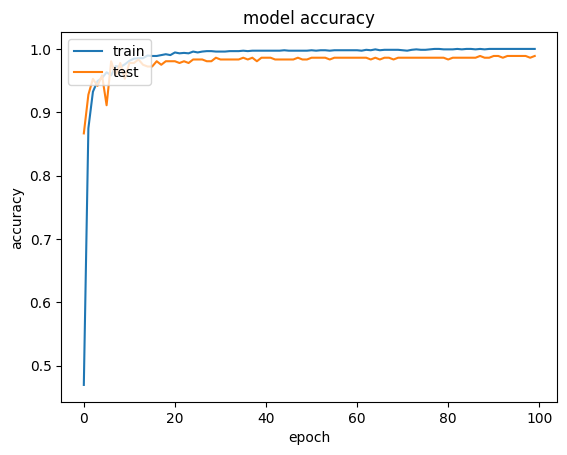

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


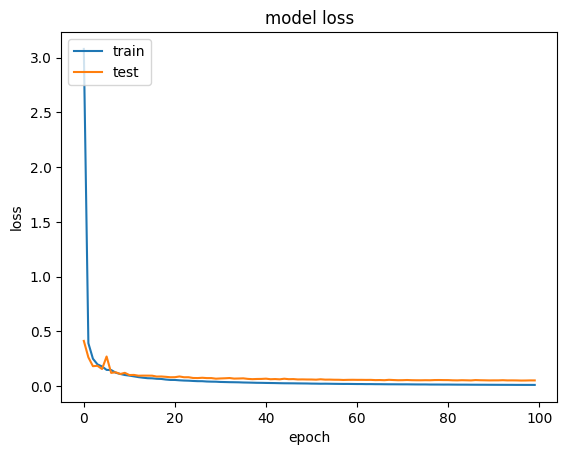

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Investigating the Confusion Matrix

We can use sklearn's classification report and confusion matrix functions to see how well our model did at predicting the correct digit.

First though, we need get predictions from our model for the test data. 

In [16]:
y_pred = model.predict(X_test) # use the model we trained to predict the test data

12/12 [==============================] - 0s 1ms/step


But, the resulting predictions are an array of 10 values, each with a probability associated with each of the 10 digits. We need to convert this to a single digit prediction. We can do this by using the argmax function to get the index of the highest probability value.

In [17]:
y_pred[0] # note that the results from the model are probabilities for each class

array([9.2027879e-09, 9.8814422e-01, 1.2632116e-05, 3.6626943e-07,
       9.0348061e-05, 1.4950015e-06, 2.5540703e-05, 1.6858094e-05,
       1.1707719e-02, 8.0832223e-07], dtype=float32)

In [18]:
y_pred[0].sum() # the probabilities sum to 1; this is a requirement for a softmax output layer

1.0

In [19]:
y_pred = y_pred.argmax(axis=1) # convert the probabilities to class labels

In [20]:
y_pred[0:10] # the class labels for the first 10 test samples

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4])

Now that we have the labeled predictions, let's use these to evaluate the model peformance and diplay the confusion matrix.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    1.0000    1.0000        41
           4     0.9744    1.0000    0.9870        38
           5     0.9375    1.0000    0.9677        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9655    0.9825        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9889       360
   macro avg     0.9882    0.9886    0.9882       360
weighted avg     0.9893    0.9889    0.9889       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


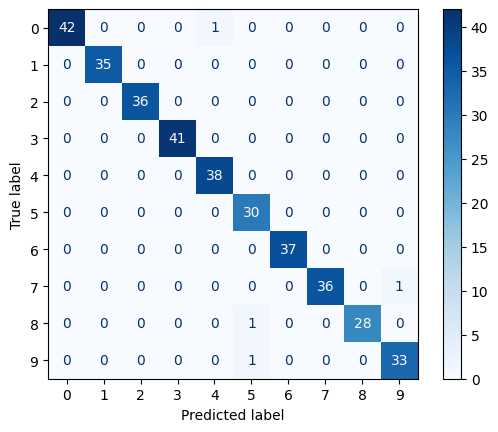

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))
      
# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)  #
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

For more information on dense layers and initializers, see the following:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/initializers/

## Summary

We have also seen how we can use Keras to build a simple MLP model to predict handwritten digits. We have seen how we can use Keras to build a model, compile the model, train the model, and evaluate the model.

The accuracy of the Keras model is 0.99, which is on par with the accuracy of the best MLPClassifier model the we saw previously (~0.99). However, the building an training of the model is simpler and took less time to train. 

> NOTE: We haven't done any hyperparameter tuning nor explore alternative architectures of layers and units (we will see examples of these in later notebooks) 

In this notebook we have seen Keras for the first time. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. It's also much more intuitive than TensorFlow, and is a good place to start learning about more complex neural network architectures.